<a href="https://colab.research.google.com/github/escobarorder/numeric-optics-python/blob/master/Charla_Seminario_Categor%C3%ADas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introducción a Python, OOP y PyTorch para Matemáticos**

(Generado con GPT o1)

¡Bienvenidos a esta introducción a Python, programación orientada a objetos (OOP) y PyTorch! Este cuaderno está diseñado para matemáticos interesados en aprender las bases necesarias para construir redes neuronales utilizando PyTorch.

## **Tabla de Contenidos**

1. [Funciones en Python](#Funciones-en-Python)
2. [Programación Orientada a Objetos](#Programación-Orientada-a-Objetos)
   - [Clases y Objetos](#Clases-y-Objetos)
   - [Herencia](#Herencia-y-Polimorfismo)
   - [Ejemplo: Clases de Distribuciones](#Ejemplo-Clases-de-Distribuciones)
3. [Introducción a PyTorch y Tensores](#Introducción-a-PyTorch-y-Tensores)
   - [Creación y Manipulación de Tensores](#Creación-y-Manipulación-de-Tensores)
   - [Operaciones Matemáticas con Tensores](#Operaciones-Matemáticas-con-Tensores)
4. [Construcción de una Red Neuronal Simple](#Construcción-de-una-Red-Neuronal-Simple)
   - [Definición de la Red Neuronal con OOP](#Definición-de-la-Red-Neuronal-con-OOP)
   - [Función de Pérdida y Optimización](#Función-de-Pérdida-y-Optimización)
   - [Entrenamiento y Evaluación](#Entrenamiento-y-Evaluación)
5. [Conclusiones](#Conclusiones)

## **Funciones en Python**

Las **funciones** son bloques de código reutilizables que realizan una tarea específica. Nos permiten modularizar y organizar mejor nuestro código.

Como ejemplo, vamos a aproximar el valor de π utilizando la **serie de Leibniz**.

### **Aproximación de π utilizando la serie de Leibniz**

La serie de Leibniz nos dice que:

$\pi = 4 \sum_{k=0}^{\infty} \frac{(-1)^k}{2k + 1}$

Implementemos esta serie en Python.

In [ ]:
import math

# Función para aproximar la suma de una serie infinita
def aproximar_pi(n):
  # Serie de Leibniz para aproximar Pi
  return 4 * sum((-1)**k / (2*k + 1) for k in range(n))

# Generar una lista de aproximaciones con n iteraciones
iteraciones = [10, 100, 1000, 10000, 100000]
aproximaciones = [aproximar_pi(n) for n in iteraciones]

# Imprimir los resultados
for n, pi_aprox in zip(iteraciones, aproximaciones):
    print(f"Con {n} iteraciones, pi ≈ {pi_aprox:.10f}")

Con 10 iteraciones, pi ≈ 3.0418396189
Con 100 iteraciones, pi ≈ 3.1315929036
Con 1000 iteraciones, pi ≈ 3.1405926538
Con 10000 iteraciones, pi ≈ 3.1414926536
Con 100000 iteraciones, pi ≈ 3.1415826536


## **Programación Orientada a Objetos**

La **programación orientada a objetos (OOP)** es un paradigma que utiliza "objetos" y sus interacciones para diseñar aplicaciones y programas. Los objetos son instancias de **clases**, que pueden contener atributos y métodos.

### **Clases y Objetos**

Una **clase** es un molde para crear objetos. Define atributos (variables) y métodos (funciones) que el objeto creado a partir de la clase tendrá.

### **Ejemplo: Clase `Gaussiana`**


In [ ]:
import math
from scipy.stats import norm

class Gaussiana:
    def __init__(self, media, desviacion_estandar):
        """Inicializa la clase con media y desviación estándar.

        Args:
            media (float): Media de la distribución.
            desviacion_estandar (float): Desviación estándar de la distribución.
        """
        self.media = media
        self.desviacion_estandar = desviacion_estandar

    def probabilidad_menor_que(self, A):
        """Calcula la probabilidad de que x sea menor que A.

        Args:
            A (float): El valor de referencia.

        Returns:
            float: La probabilidad de que x < A.
        """
        return norm.cdf(A, loc=self.media, scale=self.desviacion_estandar)

    def probabilidad_mayor_que(self, A):
        """Calcula la probabilidad de que x sea mayor que A.

        Args:
            A (float): El valor de referencia.

        Returns:
            float: La probabilidad de que x > A.
        """
        return 1 - norm.cdf(A, loc=self.media, scale=self.desviacion_estandar)



Probabilidad de que x < 1.0: 0.8413
Probabilidad de que x > 1.0: 0.1587


In [ ]:
# Ejemplo de uso
gauss = Gaussiana(0, 1)  # Distribución normal estándar

A = 1.0
prob_menor = gauss.probabilidad_menor_que(A)
prob_mayor = gauss.probabilidad_mayor_que(A)

print(gauss.media)
print(gauss.desviacion_estandar)
print(f"Probabilidad de que x < {A}: {prob_menor:.4f}")
print(f"Probabilidad de que x > {A}: {prob_mayor:.4f}")

0
1
Probabilidad de que x < 1.0: 0.8413
Probabilidad de que x > 1.0: 0.1587


## Clases heredadas

In [ ]:
class Polinomio:
    def __init__(self, coeficientes):
        """Inicializa el polinomio con una lista de coeficientes.

        Args:
            coeficientes (list): Lista de coeficientes del polinomio.
                                 El índice de la lista representa el grado.
        """
        self.coeficientes = coeficientes

    def evaluar(self, x):
        """Evalúa el polinomio en el valor dado de x.

        Args:
            x (float): Valor en el cual evaluar el polinomio.

        Returns:
            float: Valor del polinomio en x.
        """
        return sum(coef * x**i for i, coef in enumerate(self.coeficientes))

    def __str__(self):
        """Representación del polinomio como una cadena."""
        terminos = []
        for i, coef in enumerate(self.coeficientes):
            if coef != 0:
                terminos.append(f"{coef}x^{i}" if i > 0 else f"{coef}")
        return " + ".join(terminos)

In [ ]:
class PolinomioDerivable(Polinomio):
    def derivar(self):
        """Calcula la derivada del polinomio.

        Returns:
            PolinomioDerivable: Un nuevo polinomio que es la derivada del actual.
        """
        nuevos_coeficientes = [i * coef for i, coef in enumerate(self.coeficientes)][1:]
        return PolinomioDerivable(nuevos_coeficientes)

    def __str__(self):
        """Representación del polinomio derivado como una cadena."""
        return "Derivada: " + super().__str__()

In [ ]:
# Crear un polinomio p(x) = 3x^3 + 2x^2 + x
polinomio = PolinomioDerivable([0, 1, 2, 3])
print(f"Polinomio original: {polinomio}")

# Evaluar el polinomio en x = 2
print(f"Evaluación en x=2: {polinomio.evaluar(2)}")

# Derivar el polinomio
derivada = polinomio.derivar()
print(derivada)

# Evaluar la derivada en x = 2
print(f"Evaluación de la derivada en x=2: {derivada.evaluar(2)}")

Polinomio original: Derivada: 1x^1 + 2x^2 + 3x^3
Evaluación en x=2: 34
Derivada: 1 + 4x^1 + 9x^2
Evaluación de la derivada en x=2: 45


## **Introducción a PyTorch y Tensores**

**PyTorch** es una biblioteca de Python para computación numérica y aprendizaje profundo que utiliza tensores.

### **Creación y Manipulación de Tensores**

In [ ]:
import torch

# Tensor de una dimensión
tensor_1d = torch.tensor([1.0, 2.0, 3.0])

# Tensor de dos dimensiones (matriz)
tensor_2d = torch.tensor([[1.0, 2.0], [3.0, 4.0]])

print("Tensor 1D:", tensor_1d)
print("Tensor 2D:", tensor_2d)

Tensor 1D: tensor([1., 2., 3.])
Tensor 2D: tensor([[1., 2.],
        [3., 4.]])


In [ ]:
# Suma de tensores
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
suma = a + b
print("Suma:", suma)

# Producto punto
producto_punto = torch.dot(a.float(), b.float())
print("Producto punto:", producto_punto)

# Operaciones con GPU (si está disponible)
if torch.cuda.is_available():
    a_gpu = a.to('cuda')
    b_gpu = b.to('cuda')
    suma_gpu = a_gpu + b_gpu
    print("Suma en GPU:", suma_gpu)

Suma: tensor([5, 7, 9])
Producto punto: tensor(32.)


## **Construcción de una Red Neuronal Simple**

Ahora que entendemos las clases y los tensores, construyamos una red neuronal simple utilizando PyTorch y programación orientada a objetos.

In [ ]:
import torch.nn as nn

class RedNeuronalSimple(nn.Module):
    def __init__(self, entrada_size, salida_size):
        super(RedNeuronalSimple, self).__init__()
        self.capas = nn.Sequential(
            nn.Linear(entrada_size, 16),
            nn.ReLU(),
            nn.Linear(16, salida_size)
        )

    def forward(self, x):
        return self.capas(x)

In [ ]:
import torch.optim as optim

# Crear una instancia de la red
modelo = RedNeuronalSimple(entrada_size=2, salida_size=1)

# Definir el optimizador y la función de pérdida
criterio = nn.MSELoss()
optimizador = optim.SGD(modelo.parameters(), lr=0.01)

In [ ]:
# Datos de entrada (x) y salida (y) sintéticos
import numpy as np

# Generar datos aleatorios
x_train = np.random.rand(100, 2)
y_train = np.sum(x_train, axis=1, keepdims=True)

# Convertir a tensores
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

Época [200/1000], Pérdida: 0.0010
Época [400/1000], Pérdida: 0.0007
Época [600/1000], Pérdida: 0.0006
Época [800/1000], Pérdida: 0.0005
Época [1000/1000], Pérdida: 0.0005


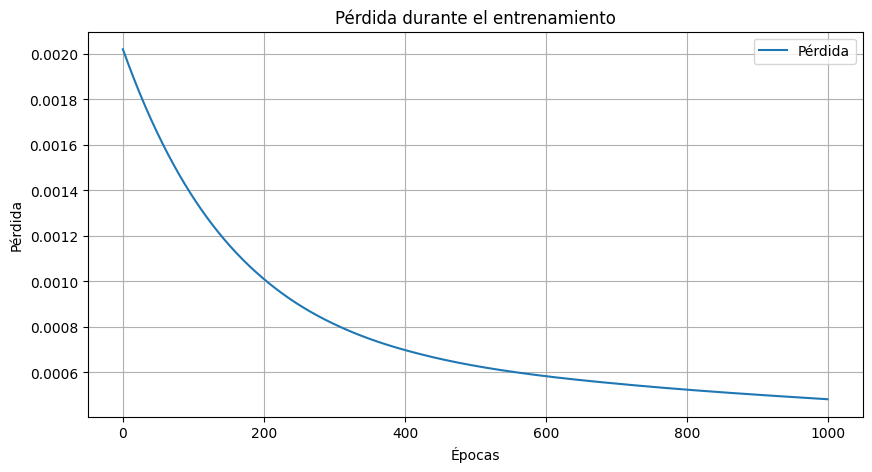

In [ ]:
import matplotlib.pyplot as plt

# Almacenar las pérdidas
perdidas = []

# Entrenamiento
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    outputs = modelo(x_train_tensor)
    loss = criterio(outputs, y_train_tensor)

    # Almacenar la pérdida
    perdidas.append(loss.item())

    # Backward pass y optimización
    optimizador.zero_grad()
    loss.backward()
    optimizador.step()

    if (epoch + 1) % 200 == 0:
        print(f'Época [{epoch + 1}/{epochs}], Pérdida: {loss.item():.4f}')

# Graficar la pérdida
plt.figure(figsize=(10, 5))
plt.plot(perdidas, label='Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.grid()
plt.show()

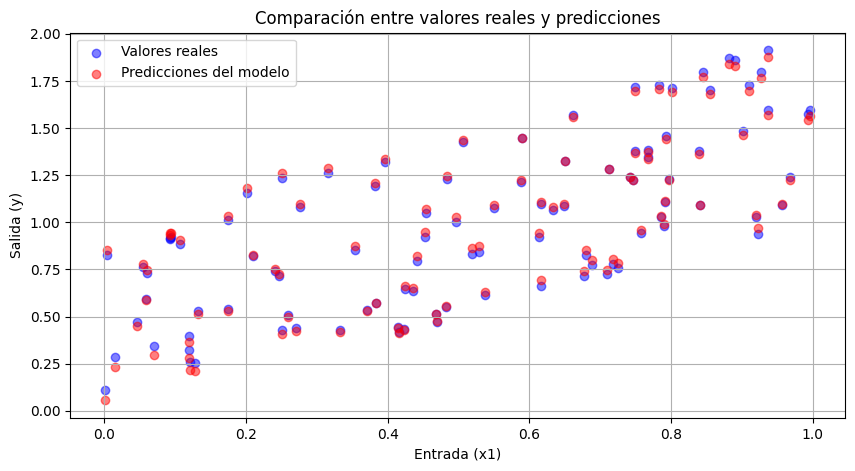

In [ ]:
# Hacer predicciones
modelo.eval()  # Cambiar a modo evaluación
predicciones = modelo(x_train_tensor).detach().numpy()

# Graficar las predicciones
plt.figure(figsize=(10, 5))
plt.scatter(x_train[:, 0], y_train, color='blue', label='Valores reales', alpha=0.5)
plt.scatter(x_train[:, 0], predicciones, color='red', label='Predicciones del modelo', alpha=0.5)
plt.title('Comparación entre valores reales y predicciones')
plt.xlabel('Entrada (x1)')
plt.ylabel('Salida (y)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import pandas as pd
# Hacer predicciones
modelo.eval()  # Cambiar a modo evaluación
predicciones = modelo(x_train_tensor).detach().numpy()

# Seleccionar 10 valores aleatorios
indices_aleatorios = np.random.choice(range(len(y_train)), size=10, replace=False)

# Crear una tabla con pandas
tabla = pd.DataFrame({
    'Valor real': y_train[indices_aleatorios].flatten(),
    'Predicción': predicciones[indices_aleatorios].flatten()
})

# Imprimir la tabla
print(tabla)

   Valor real  Predicción
0    1.074286    1.092605
1    0.759765    0.782966
2    1.873630    1.841148
3    0.252089    0.213566
4    1.912820    1.875492
5    0.320828    0.280887
6    0.542995    0.529063
7    0.644914    0.660061
8    1.797478    1.764624
9    1.013812    1.034169


### **Conclusiones**

- Hemos explorado las bases de Python y cómo utilizar funciones para resolver problemas matemáticos.
- Aprendimos sobre programación orientada a objetos y cómo definir clases y objetos.
- Introdujimos PyTorch y trabajamos con tensores, fundamentales para el aprendizaje profundo.
- Construimos una red neuronal simple utilizando PyTorch y OOP.
- Vimos cómo las redes neuronales pueden modelar relaciones matemáticas y aprendimos los conceptos básicos para construir modelos más complejos.

## **Apéndice: Recursos Adicionales**

- [Documentación oficial de PyTorch](https://pytorch.org/docs/)
- [Tutoriales de PyTorch](https://pytorch.org/tutorials/)
- [Curso de Deep Learning con PyTorch](https://www.udacity.com/course/deep-learning-pytorch--ud188)

---

**Nota:** Este cuaderno está diseñado para ser ejecutado secuencialmente. Asegúrate de tener instaladas las bibliotecas necesarias, como `torch` y `matplotlib`, para ejecutar todos los ejemplos correctamente.